In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import pandas as pd

In [ ]:
# carregando o dataset Iris

iris = load_iris()

# dividindo o dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target, test_size=0.2, random_state=42)

# criando uma instancia do classificador de árvore de decisão

dtc = DecisionTreeClassifier()

# treinando o modelo com os dados de treino

dtc.fit(X_train, y_train)

# fazendo previsões com os dados de teste

y_pred = dtc.predict(X_test)

# avaliando a performance do modelo utilizando a acurácia

acc = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {acc:.2f}")

# plotando a árvore de decisão

plt.figure(figsize=(20, 20))
plot_tree(dtc, filled=True)
plt.show()

# Explicação

Nesse exemplo, o dataset Iris é carregado utilizando a função load_iris do Scikit-learn, e os dados são armazenados na variável iris. Em seguida, os dados são divididos em conjuntos de treino e teste utilizando a função train_test_split, onde 80% dos dados são utilizados para treino e 20% para teste. Uma instância do modelo de árvore de decisão é criada utilizando a classe DecisionTreeClassifier, e o modelo é treinado utilizando o método fit com os dados de treino. Em seguida, o modelo é utilizado para fazer previsões com os dados de teste utilizando o método predict. A performance do modelo é avaliada utilizando a acurácia, que é calculada utilizando a função accuracy_score do Scikit-learn que varia entre 0 e 1, quanto mais próximo de 1 maior é a acurácia do modelo (melhor é o modelo).

Podemos visualizar a árvore de decisão criada pelo modelo utilizando a biblioteca Matplotlib. O código plot_tree(dtc, filled=True) gera um diagrama da árvore de decisão, onde cada nó representa uma decisão ou um atributo e cada ramo representa uma possível resposta ou um resultado. A opção filled=True preenche os nós com cores para indicar a classe predominante em cada nó.

A árvore de decisão é uma técnica bastante útil em problemas de classificação e pode ser utilizada em diferentes áreas, como medicina, finanças, engenharia, entre outras. No exemplo acima, utilizamos o dataset Iris para classificar flores com base em características como comprimento e largura das pétalas e sépalas.

In [2]:
# Adicionando a dataset a variável 'data'
data = load_iris()

In [3]:
# tranformando os dados em um DataFrame do pandas

iris = pd.DataFrame(data.data)
iris.columns = data.feature_names
iris['target'] = data.target
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Iniciando somente com targets 0 e 1

In [4]:
# Selecionando apenas as colunas de pétalas e esses targets

iris1 = iris.loc[iris.target.isin([1, 2]), ['petal length (cm)', 'petal width (cm)', 'target']]
iris1

,petal length (cm),petal width (cm),target
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1
53,4.0,1.3,1
54,4.6,1.5,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [11]:
# Separando os dados em X e y

X = iris1.drop('target', axis=1)
y = iris1['target']

In [12]:
# Fazendo o train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

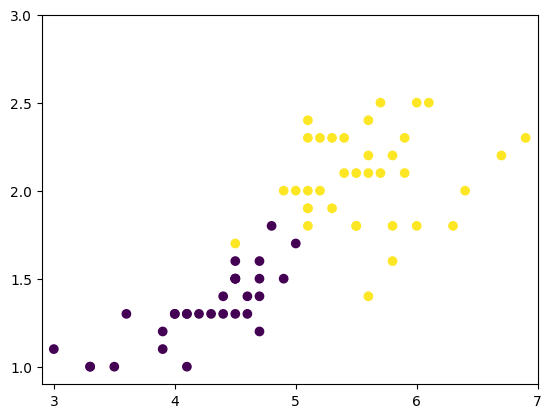

In [34]:
# Visualizando os dados de treino

fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=y_train)

ax.set(xlim=(2.9,7), xticks=[3,4,5,6,7],
       ylim=(0.9, 2.7), yticks=[1,1.5,2,2.5,3])

plt.show()

In [21]:
# criando o classificador de árvore de decisão
clf = DecisionTreeClassifier(random_state=42)

In [22]:
# Fazendo o fit com os dados de treino
clf = clf.fit(X_train, y_train)

In [23]:
# verificando o score de acuracia
score = clf.score(X_train, y_train)
score

1.0

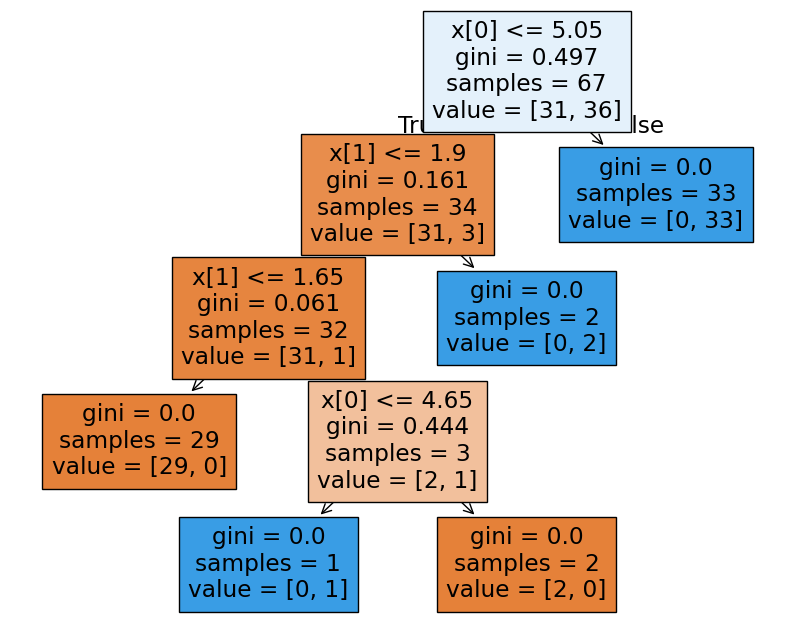

In [58]:
# Visualizando essa árvore

fig, ax = plt.subplots(figsize=(10,8))    # Não é necessário

plot_tree(clf, filled=True)

plt.show()                  # Não é necessário

# x[0] representa o eixo X enquanto x[1] representa o eixo Y
# Samples = Quantidade de pontos classificados
# value = [quantidade classificada como 1, quantidade classificada como 2] (Obs: 1 e 2 pois foram os targets definidos neste caso)


In [2]:
# Adicionadno as regras ao gráfico

fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=y_train)

ax.set(xlim=(2.9,7), xticks=[3,4,5,6,7],
       ylim=(0.9, 2.7), yticks=[1,1.5,2,2.5])

ax.plot([5.05,5.05], [0.9,2.7], '--r')
ax.plot([2.9,5.05], [1.9,1.9], '--r')
ax.plot([2.9,5.05], [1.65,1.65], '--r')
ax.plot([4.65,4.65], [1.65,1.9], '--r')

plt.show()

NameError: name 'plt' is not defined

In [44]:
# fazendo a previsão e avaliando o erro

y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix # importando a matriz de confusão que é uma métrica de avaliação

confusion_matrix(y_test, y_pred)

array([[18,  1],
       [ 6,  8]])

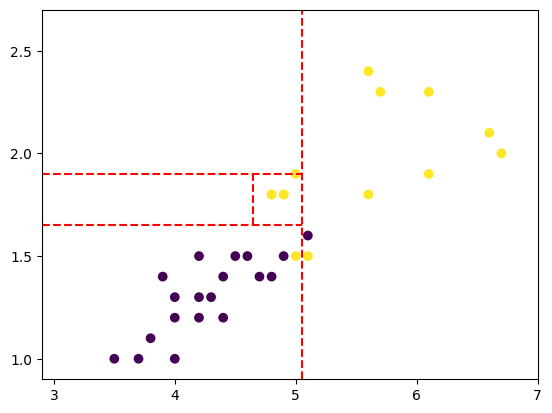

In [50]:
# Visualizando os dados de teste no gráfico

fig, ax = plt.subplots()

ax.scatter(X_test['petal length (cm)'], X_test['petal width (cm)'], c=y_test)

ax.set(xlim=(2.9,7), xticks=[3,4,5,6,7],
       ylim=(0.9, 2.7), yticks=[1,1.5,2,2.5])

ax.plot([5.05,5.05], [0.9,2.7], '--r')
ax.plot([2.9,5.05], [1.9,1.9], '--r')
ax.plot([2.9,5.05], [1.65,1.65], '--r')
ax.plot([4.65,4.65], [1.65,1.9], '--r')

plt.show()

In [52]:
# Separando X e y da base completa

X = iris.drop('target', axis=1)
y = iris.target

In [53]:
# Fazendo o train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [54]:
# Fazendo o classificador e o fit

clf2 = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

In [ ]:
clf2.score(X_train, y_train) # Resulta em 1, ou seja, ele se adaptou tão bem aos dados de treino, que praticamente "Decorou" a resposta. Ou seja, temos que ter cuidado.

1.0

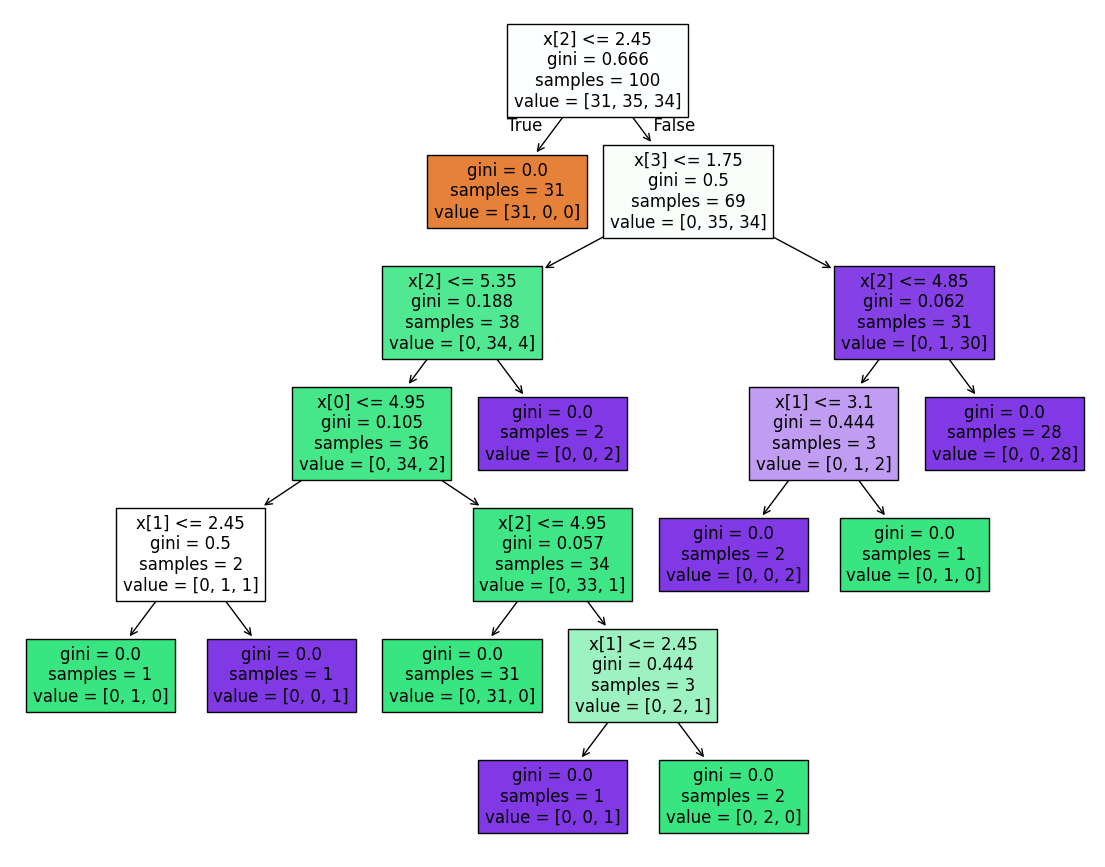

In [73]:
# Visualizando a árvore

fig, ax = plt.subplots(figsize=(14,11))

plot_tree(clf2, filled=True)

plt.show()

In [66]:
# Fazendo a previsão

y_pred2 = clf2.predict(X_test)

In [ ]:
# Avaliando o modelo

confusion_matrix(y_test, y_pred2)   # Somente errou um dado pois    [19, 0, 0], < todos os valores se enquandraram no local correto
                                    #                               [0, 15, 0], 
                                    #                               [0, 1, 15]  < um dos valores foi enquadrado no local errado, este deveria ser enquadrado a direita. Ou seja, 
                                    #                                               era para ser target 2 mas foi enquadrado como 1

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])